## Modele de prédiction de maladies cardiovasculaires

L'objectif principal du projet est de développer un modèle capable d'identifier très tôt les individus à risque de développer une maladie cardiovasculaire.

### Exploration et Pré traitement des données

Dans cette partie, nous allons verifier les informations de notre dataset et procéder à un nettoyage si nécessaire

In [42]:
# Importation des paquets
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("./heart.csv")
# Nous affichons les données comprises dans le dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Nous allons séparer les données categorielles des données quantitatives du dataset pour faire une meilleure analyse

In [4]:
# Nombre de lignes et de colonnes
df.shape

(918, 12)

In [14]:
# Verifier si des valeurs nulles ont été détectées
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

> Nous n'avons relevé aucune valeur manquante dans notre jeu de données.

### Donnes quantitatives

In [5]:
# Faire la description quantitative du jeu de données
df_q = df.select_dtypes(include='number')
df_q.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Lors de notre exploration des données quantitatives, nous avons observé des données incohérentes
- RestingBP (tension artérielle au repos) --> min = 0 (Valeur impossible biologique)
- Cholesterol --> min = 0 (Impossible)
- Oldpeak --> Valeurs negatives. ex = -2.6 (valeurs erronées)
Nous allons verifier alors combien de valeurs sont incohérentes

In [15]:
# Verification du nombre de valeurs incohérentes
(df['RestingBP'] == 0).sum(), (df['Cholesterol'] == 0).sum(), (df['Oldpeak'] < 0).sum()

(1, 172, 13)

Nous avons les données aberrantes suivantes. Nous allons les isoler et ensuites les remplacer intelligemment

In [16]:
# Isoler les valeurs aberrantes
df['RestingBP'] = df['RestingBP'].replace(0, np.nan)
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
df.loc[df['Oldpeak'] < 0, 'Oldpeak'] = np.nan

In [18]:
# Verifier si les modifications ont été prises en compte
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak            13
ST_Slope            0
HeartDisease        0
dtype: int64

Nous allons remplacer les données isolés par la methode de la médiane

In [19]:
# Remplacer les données aberrantes par la méthode de la médiane
df['RestingBP'].fillna(df['RestingBP'].median(), inplace=True)
df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)
df['Oldpeak'].fillna(df['Oldpeak'].median(), inplace=True)

C:\Users\moust\AppData\Local\Temp\ipykernel_33704\3306671707.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RestingBP'].fillna(df['RestingBP'].median(), inplace=True)
C:\Users\moust\AppData\Local\Temp\ipykernel_33704\3306671707.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [20]:
# Verification des modifications
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,243.204793,0.233115,136.809368,0.909804,0.553377
std,9.432617,17.990127,53.401297,0.423046,25.460334,1.040160,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Nous pouvons constater que toutes les données aberrantes ont été correctement remplacées

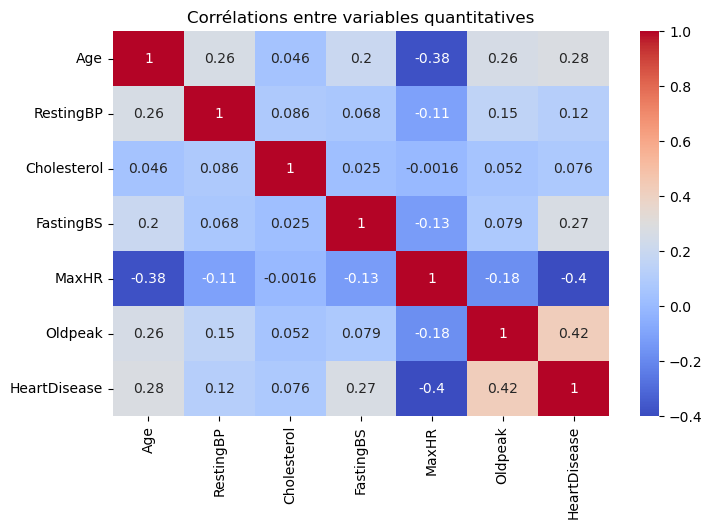

In [23]:
# Matrice de correlation des valeurs quantitatives
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Corrélations entre variables quantitatives")
plt.show()


Les corrélations les plus fortes impliquent la variable cible (HeartDisease), ce qui est crucial pour comprendre les facteurs de risque :
<ul>
    <li>HeartDisease et Oldpeak ($\mathbf{0.42}$) : Il existe une corrélation positive modérée entre l'indicateur Oldpeak (dépression du segment ST à l'ECG) et la présence de maladie cardiaque. Cela signifie que plus la valeur d'Oldpeak est élevée, plus le risque ou la présence de maladie cardiaque est susceptible d'être élevé.</li>
<li>HeartDisease et MaxHR ($\mathbf{-0.40}$) : Il existe une corrélation négative modérée entre le taux cardiaque maximum atteint pendant l'effort (MaxHR) et la maladie cardiaque. Cela suggère que les patients ayant une maladie cardiaque confirmée ou à risque ont tendance à atteindre un MaxHR plus faible pendant l'exercice (ce qui est souvent un signe de mauvaise condition physique ou de limitation cardiaque).</li>
<li>HeartDisease et FastingBS ($\mathbf{0.27}$) : Le taux de sucre dans le sang à jeun (FastingBS) montre une faible corrélation positive, suggérant un lien entre une glycémie élevée à jeun et un risque accru de maladie cardiaque.</li></ul>
Conclusion Clé : Oldpeak et MaxHR sont les deux variables qui ont la relation linéaire la plus prononcée avec le diagnostic de maladie cardiaque dans cet ensemble de données.

### Données qualitatives

In [6]:
# Faire la description qualitative du jeu de données
df_c = df.select_dtypes(include="object")
df_c.describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [24]:
# Verification de la qualité des donnees categorielles
df_c.isna().sum()

Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64

> Nous n'avons relevé aucune donnée manquante

Ici nous vérifions la répartition des données catégorielles

In [31]:
for col in df_c.columns:
    print(df[col].value_counts(normalize=True) * 100)
    print("-" * 30)


Sex
M    78.976035
F    21.023965
Name: proportion, dtype: float64
------------------------------
ChestPainType
ASY    54.030501
NAP    22.113290
ATA    18.845316
TA      5.010893
Name: proportion, dtype: float64
------------------------------
RestingECG
Normal    60.130719
LVH       20.479303
ST        19.389978
Name: proportion, dtype: float64
------------------------------
ExerciseAngina
N    59.586057
Y    40.413943
Name: proportion, dtype: float64
------------------------------
ST_Slope
Flat    50.108932
Up      43.028322
Down     6.862745
Name: proportion, dtype: float64
------------------------------


### Encodage des valeurs categorielles
Dans cette partie, nous procédons à l'encodage des variables catégorielles

In [34]:
# Nous allons faire l'encodage avec le one-hot encoding car nos données n'ont pas d'ordre logique
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [41]:
# Nous verifions la relation entre les variables qualitatives et la varaible cible
df_encoded_corr = df_encoded.corr()['HeartDisease'].sort_values(ascending=False)
df_encoded_corr

HeartDisease         1.000000
ST_Slope_Flat        0.554134
ExerciseAngina_Y     0.494282
Oldpeak              0.424747
Sex_M                0.305445
Age                  0.282039
FastingBS            0.267291
RestingBP            0.117798
RestingECG_ST        0.102527
Cholesterol          0.076114
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
MaxHR               -0.400421
ChestPainType_ATA   -0.401924
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64

> L'analyse de corrélation révèle que les **indicateurs liés aux tests d'effort** sont les prédicteurs les plus puissants de la maladie cardiaque, surpassant les facteurs physiologiques de base. La **pente montante (Up)** du segment ST est le facteur le plus fortement corrélé à **l'absence de maladie** ($\mathbf{-0.622}$), tandis qu'une **pente plate (Flat)** est le facteur le plus fortement corrélé à la **présence de maladie** ($\mathbf{0.554}$). L'angine induite par l'effort ($\mathbf{0.494}$) et un Oldpeak élevé ($\mathbf{0.425}$) sont également des indicateurs positifs majeurs. Inversement, un taux cardiaque maximal élevé (**MaxHR**) et un type de douleur thoracique atypique (**ATA**) sont associés à un risque plus faible. Les variables démographiques comme l'âge ($\mathbf{0.282}$) et le sexe masculin ($\mathbf{0.305}$) sont des facteurs de risque, mais leur influence linéaire est moindre que celle des résultats d'effort.


### Standardisation des données numeriques

In [43]:
# 1. Définir les variables numériques à standardiser
col_standardise = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# 2. Initialiser le Standard Scaler
scaler = StandardScaler()

# 3. Appliquer la standardisation (fit_transform) uniquement aux colonnes numériques
# Le résultat est un array numpy, que nous réassignons au DataFrame pour mettre à jour les colonnes.
df_encoded[col_standardise] = scaler.fit_transform(df_encoded[col_standardise])

# Afficher les premières lignes pour vérifier que les valeurs ont été transformées
print(df_encoded.head())

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.433140   0.415002     0.858035  -0.551341  1.382928 -0.875154   
1 -0.478484   1.527329    -1.184227  -0.551341  0.754157  0.086761   
2 -1.751359  -0.141161     0.745617  -0.551341 -1.525138 -0.875154   
3 -0.584556   0.303769    -0.547191  -0.551341 -1.132156  0.567718   
4  0.051881   0.971166    -0.903182  -0.551341 -0.581981 -0.875154   

   HeartDisease  Sex_M  ChestPainType_ATA  ChestPainType_NAP  \
0             0   True               True              False   
1             1  False              False               True   
2             0   True               True              False   
3             1  False              False              False   
4             0   True              False               True   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  \
0             False               True          False             False   
1             False               True      

In [44]:
df_encoded.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,918.000000
mean,-1.083616e-16,1.760877e-16,2.399436e-16,-3.096047e-17,4.953675e-16,1.083616e-16,0.553377
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,0.497414
min,-2.706015e+00,-2.921979e+00,-2.964180e+00,-5.513413e-01,-3.018469e+00,-8.751540e-01,0.000000
25%,-6.906294e-01,-6.973248e-01,-5.471911e-01,-5.513413e-01,-6.605778e-01,-8.751540e-01,0.000000
50%,5.188098e-02,-1.411613e-01,-1.162551e-01,-5.513413e-01,4.678968e-02,-2.980050e-01,1.000000
75%,6.883185e-01,4.150021e-01,4.458352e-01,-5.513413e-01,7.541571e-01,5.677184e-01,1.000000
max,2.491558e+00,3.751983e+00,6.741247e+00,1.813758e+00,2.561874e+00,5.088719e+00,1.000000


## Analyse et choix du modele prédictif

Dans cette partie nous allons separer notre dataset en deux parties. Ensuite, nous allons tester plusieurs modeles et en choisir celui avec les meilleures performances

In [46]:
from sklearn.model_selection import train_test_split

# 1. Séparer les Features (X) et la Cible (y)
# 'HeartDisease' est la colonne cible
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# 2. Diviser les données en ensembles d'entraînement et de test
# On utilise typiquement un split de 80% pour l'entraînement et 20% pour le test.
# stratify=y est crucial car il assure que la proportion de 'HeartDisease' (0 et 1)
# est la même dans les ensembles X_train/X_test et y_train/y_test,
# ce qui est vital pour les données déséquilibrées.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, # Permet de reproduire les mêmes résultats à chaque exécution
    stratify=y       
)

# 3. Vérifier les dimensions des nouveaux ensembles
print("\n Dimensions des ensembles de données :")
print(f"X_train (Entraînement) : {X_train.shape}")
print(f"X_test (Test) : {X_test.shape}")
print(f"y_train (Cible Entraînement) : {y_train.shape}")
print(f"y_test (Cible Test) : {y_test.shape}")


 Dimensions des ensembles de données :
X_train (Entraînement) : (734, 15)
X_test (Test) : (184, 15)
y_train (Cible Entraînement) : (734,)
y_test (Cible Test) : (184,)


In [47]:
# Importation des modeles et des metriques
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [49]:
# Dans cette partie nous procédons à l'entrainement des trois modeles
# Régression Logistique
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# SVM (linéaire)
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

### Prédiction et Evaluation de nos modeles
Dans cette partie, nous créons une petite fonction d'évalutation de nos modeles de prédiction

In [50]:
def evaluate_model(name, model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(f"🔹 {name}")
    print("Accuracy :", round(accuracy_score(y_test, y_pred), 3))
    print("Precision:", round(precision_score(y_test, y_pred), 3))
    print("Recall   :", round(recall_score(y_test, y_pred), 3))
    print("F1-score :", round(f1_score(y_test, y_pred), 3))
    
    if y_proba is not None:
        print("ROC-AUC  :", round(roc_auc_score(y_test, y_proba), 3))
    print("-" * 40)


In [52]:
evaluate_model("Logistic Regression", log_reg, X_test, y_test)
evaluate_model("Random Forest", rf, X_test, y_test)
evaluate_model("SVM", svm, X_test, y_test)

🔹 Logistic Regression
Accuracy : 0.886
Precision: 0.879
Recall   : 0.922
F1-score : 0.9
ROC-AUC  : 0.934
----------------------------------------
🔹 Random Forest
Accuracy : 0.859
Precision: 0.88
Recall   : 0.863
F1-score : 0.871
ROC-AUC  : 0.927
----------------------------------------
🔹 SVM
Accuracy : 0.859
Precision: 0.865
Recall   : 0.882
F1-score : 0.874
ROC-AUC  : 0.934
----------------------------------------


In [55]:
results = []

for name, model in [
    ("Logistic Regression", log_reg),
    ("Random Forest", rf),
    ("SVM", svm)
]:
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0]*len(y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba) if hasattr(model, "predict_proba") else None
    })

comparison = pd.DataFrame(results)
comparison


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.885870,0.878505,0.921569,0.899522,0.934003
1,Random Forest,0.858696,0.880000,0.862745,0.871287,0.927009
2,SVM,0.858696,0.865385,0.882353,0.873786,0.933644


### Visualisation de la performance

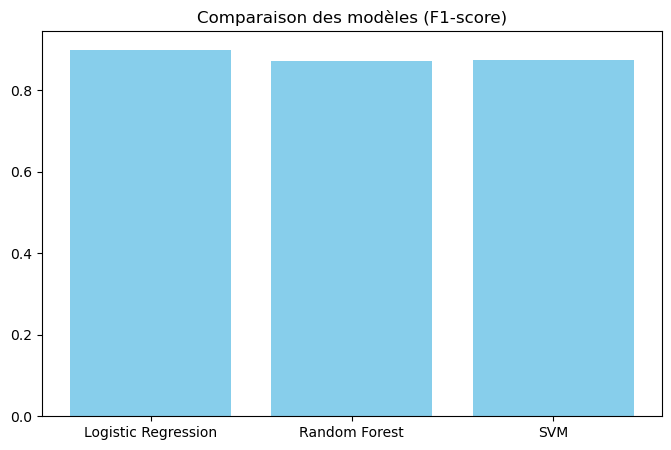

In [56]:
plt.figure(figsize=(8,5))
plt.bar(comparison['Model'], comparison['F1-Score'], color='skyblue')
plt.title('Comparaison des modèles (F1-score)')
plt.show()

### Conclusion

Les résultats obtenus montrent que les trois modèles présentent de très bonnes performances globales, avec des scores d’**accuracy** supérieurs à 85 % et des **F1-scores** élevés, indiquant un bon équilibre entre précision et rappel. Toutefois, la **régression logistique** se démarque légèrement avec une **accuracy de 0.886**, un **F1-score de 0.90** et surtout un **rappel de 0.922**, ce qui signifie qu’elle identifie mieux les cas positifs (patients atteints de maladie cardiaque) que les autres modèles. Son **ROC-AUC de 0.934**, équivalent à celui du SVM, montre également une excellente capacité à discriminer entre les classes. En revanche, le **Random Forest**, bien que performant, présente une légère baisse de généralisation (accuracy et recall plus faibles).
Pour conclure, la **régression logistique** apparaît comme le modèle le plus pertinent dans ce contexte : elle est simple, interprétable et légèrement supérieure sur les principaux indicateurs, notamment en termes de rappel, ce qui est crucial pour un problème médical où il vaut mieux **minimiser les faux négatifs** que les faux positifs.
